# Filtergram Trade Study

In [1]:
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import quantity_support, ImageNormalize, LogStretch
import ndcube

from mocksipipeline.detector.response import Channel, convolve_with_response
from mocksipipeline.detector.filter import ThinFilmFilter
from mocksipipeline.util import read_data_cube

Read the spectral cube that we'll use for all simulations

In [2]:
spectral_cube = read_data_cube('../sandbox/data/moxsi-spectral-cube-ar.fits', hdu=1)

Define a function for quickly computing a filtergram image

In [3]:
def make_filtergram_quick(spectral_cube, tf_filter):
    """
    This is a quick and dirty way to compute the filtergram images.
    """
    chan = Channel('filtergram_1', tf_filter)
    instr_cube = convolve_with_response(spectral_cube, chan, include_gain=False)
    data = instr_cube.data.sum(axis=0)
    meta = {'FILTER': chan.filter_label}
    summed_cube = ndcube.NDCube(data, wcs=instr_cube[0].wcs, unit=instr_cube.unit, meta=meta)
    # TODO: optionally do an easy reprojection here from one 2D image to another
    return summed_cube

## Nominal Filters

These are the nominal filters

In [4]:
polymide = ThinFilmFilter(elements=['C','H','N','O'],
                          quantities=[22,10,2,5],
                          density=1.43*u.g/u.cm**3,
                          thickness = 100*u.nm)

In [5]:
be_thin = ThinFilmFilter(elements='Be', thickness=9*u.micron)
be_med = ThinFilmFilter(elements='Be', thickness=30*u.micron)
be_thick = ThinFilmFilter(elements='Be', thickness=300*u.micron)
al_poly = [
    ThinFilmFilter(elements='Al', thickness=1.25*u.micron),
    polymide,
]

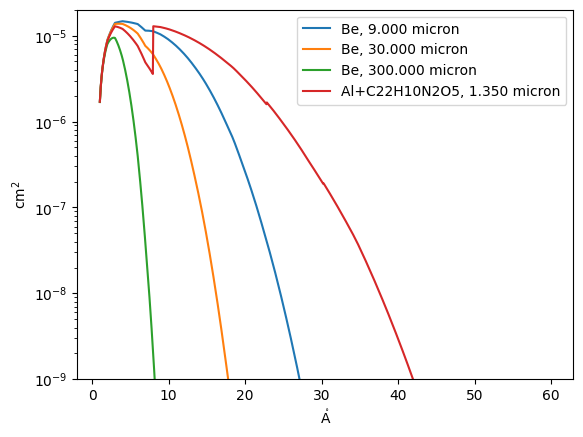

In [6]:
with quantity_support():
    for ff in [be_thin, be_med, be_thick, al_poly]:
        ch = Channel('filtergram', ff)
        plt.plot(ch.wavelength, ch.effective_area, label=ch.filter_label)
    plt.yscale('log')
    plt.ylim(1e-9, 2e-5)
    plt.legend()

In [7]:
be_thin_image = make_filtergram_quick(spectral_cube, be_thin)
be_med_image = make_filtergram_quick(spectral_cube, be_med)
be_thick_image = make_filtergram_quick(spectral_cube, be_thick)
al_poly_image = make_filtergram_quick(spectral_cube, al_poly)

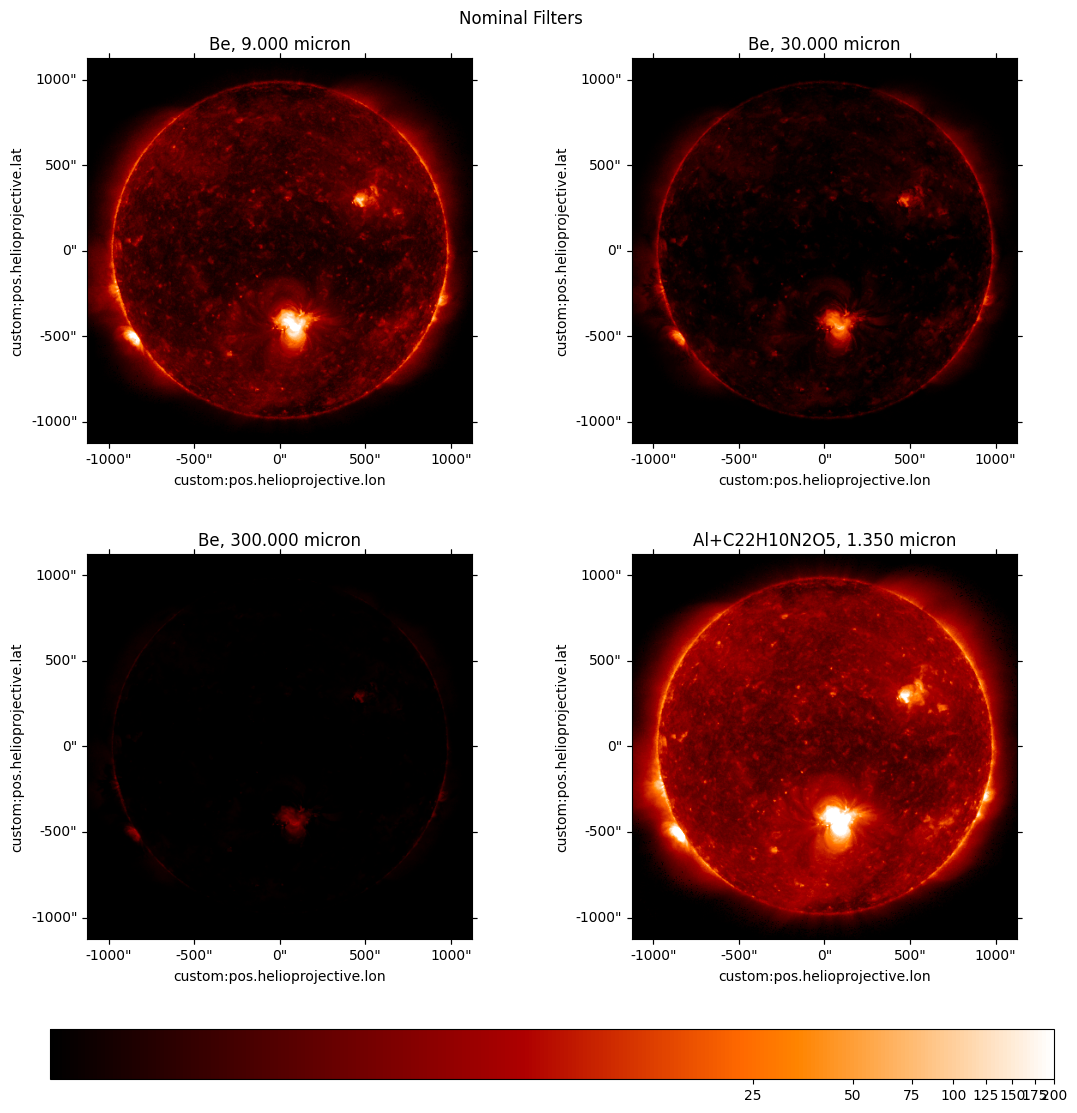

In [8]:
fig = plt.figure(figsize=(11,11),constrained_layout=True)
norm = ImageNormalize(vmin=1e-2, vmax=2e2, stretch=LogStretch())
ax_list = []
for i,fg_image in enumerate([be_thin_image, be_med_image, be_thick_image, al_poly_image]):
    ax = fig.add_subplot(2,2,i+1, projection=fg_image.wcs,)
    fg_image.plot(axes=ax, norm=norm, cmap='hinodexrt', data_unit='ph / (pix h)')
    ax.set_title(fg_image.meta['FILTER'])
    ax_list.append(ax)
fig.suptitle('Nominal Filters',)
fig.colorbar(ax.get_images()[0], ax=[ax_list[-2], ax_list[-1]], location='bottom', )

## Proposed Filters

Athiray mentioned three additional materials for the filtergram filters:

- Fe
- Cr
- Ti

with several different thicknesses:

- .3 $\mathrm{\mu m}$
- .5 $\mathrm{\mu m}$
- 1 $\mathrm{\mu m}$
- 1.5 $\mathrm{\mu m}$
- 2 $\mathrm{\mu m}$
- 5 $\mathrm{\mu m}$

### Fe 

In [9]:
filtergram_thicknesses = [.3, .5, 1, 1.5, 2, 5] * u.micron

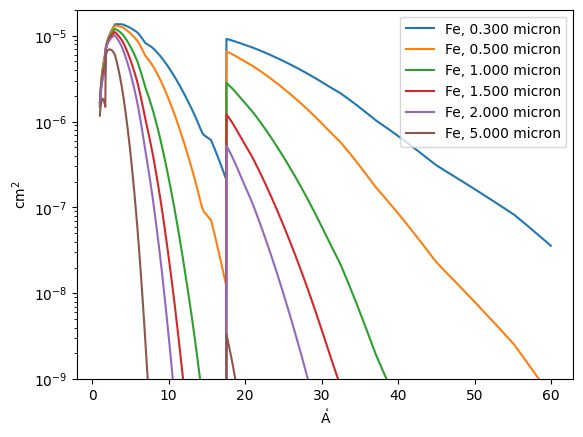

In [10]:
fe_filters = [ThinFilmFilter(elements='Fe', thickness=ft) for ft in filtergram_thicknesses]
with quantity_support():
    for ff in fe_filters:
        ch = Channel('filtergram', ff)
        plt.plot(ch.wavelength, ch.effective_area, label=ch.filter_label)
    plt.yscale('log')
    plt.ylim(1e-9, 2e-5)
    plt.legend()

In [11]:
iron_images = [make_filtergram_quick(spectral_cube, tff) for tff in fe_filters]

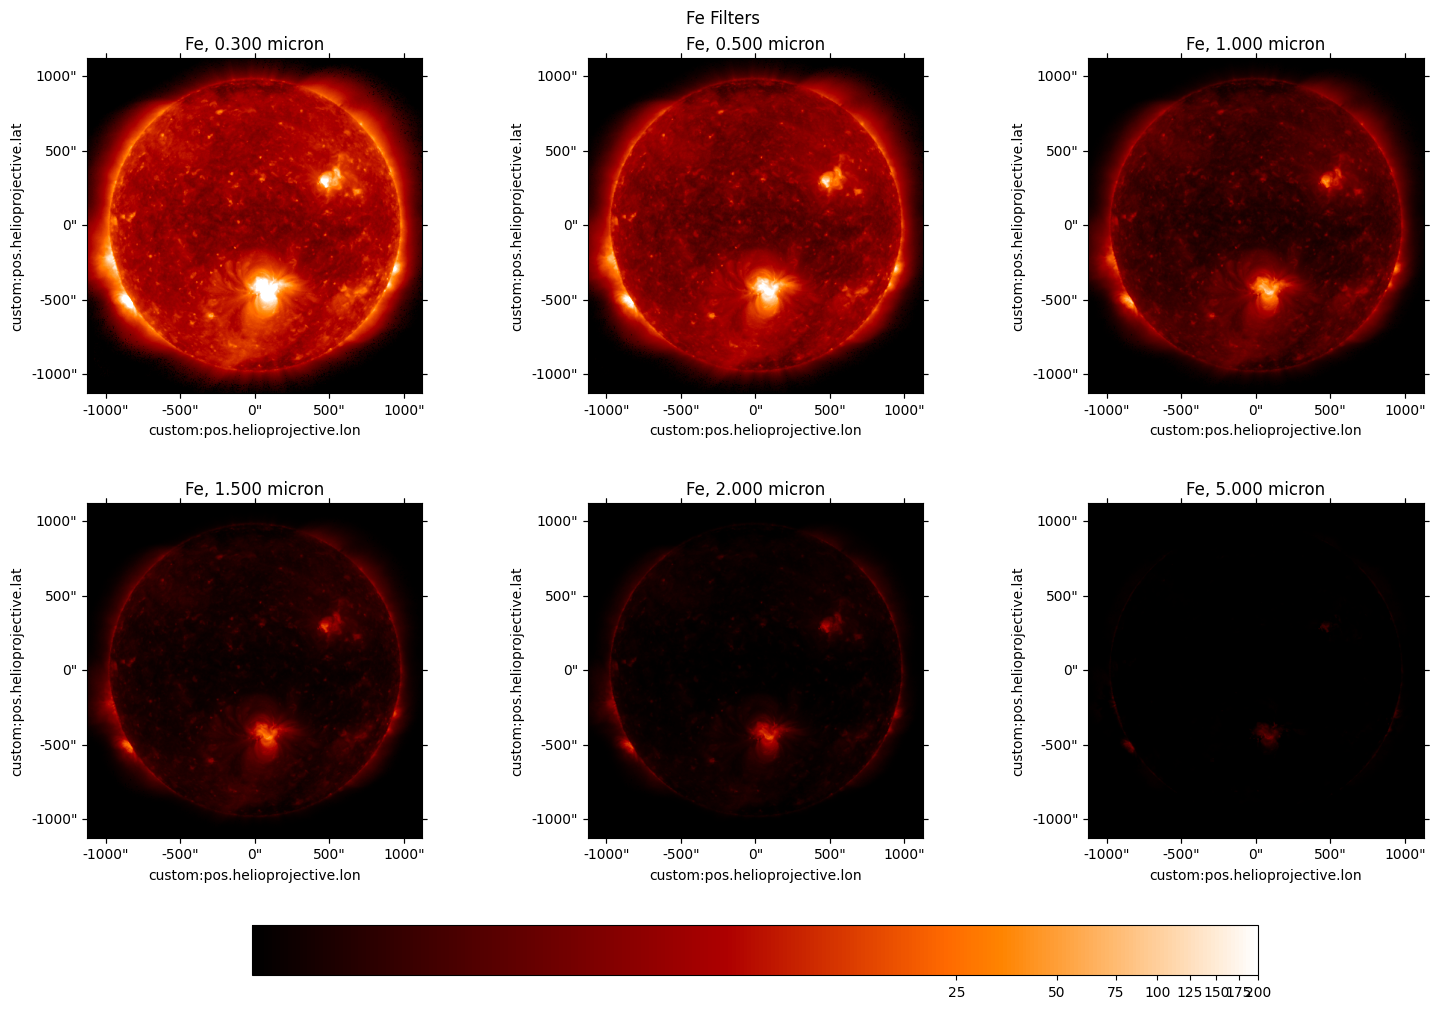

In [12]:
fig = plt.figure(figsize=(15,10), constrained_layout=True)
ax_list = []
for i,fg_image in enumerate(iron_images):
    ax = fig.add_subplot(2,3,i+1, projection=fg_image.wcs)
    fg_image.plot(axes=ax, norm=norm, cmap='hinodexrt', data_unit='ph / (pix h)')
    ax.set_title(fg_image.meta['FILTER'])
    ax_list.append(ax)
fig.suptitle('Fe Filters',)
fig.colorbar(ax.get_images()[0], ax=[ax_list[-3], ax_list[-2], ax_list[-1]], location='bottom', )

### Cr

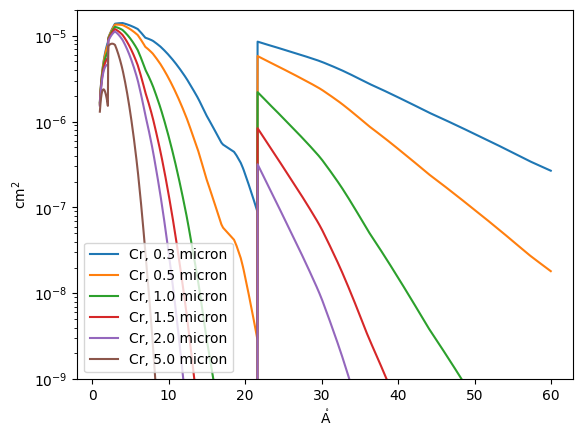

In [13]:
cr_filters = [ThinFilmFilter(elements='Cr', thickness=ft) for ft in filtergram_thicknesses]
with quantity_support():
    for ff in cr_filters:
        ch = Channel('filtergram', ff)
        label = f'{ff.chemical_formula}, {ff.thickness}'
        plt.plot(ch.wavelength, ch.effective_area, label=label)
    plt.yscale('log')
    plt.ylim(1e-9, 2e-5)
    plt.legend()

In [14]:
cr_images = [make_filtergram_quick(spectral_cube, tff) for tff in cr_filters]

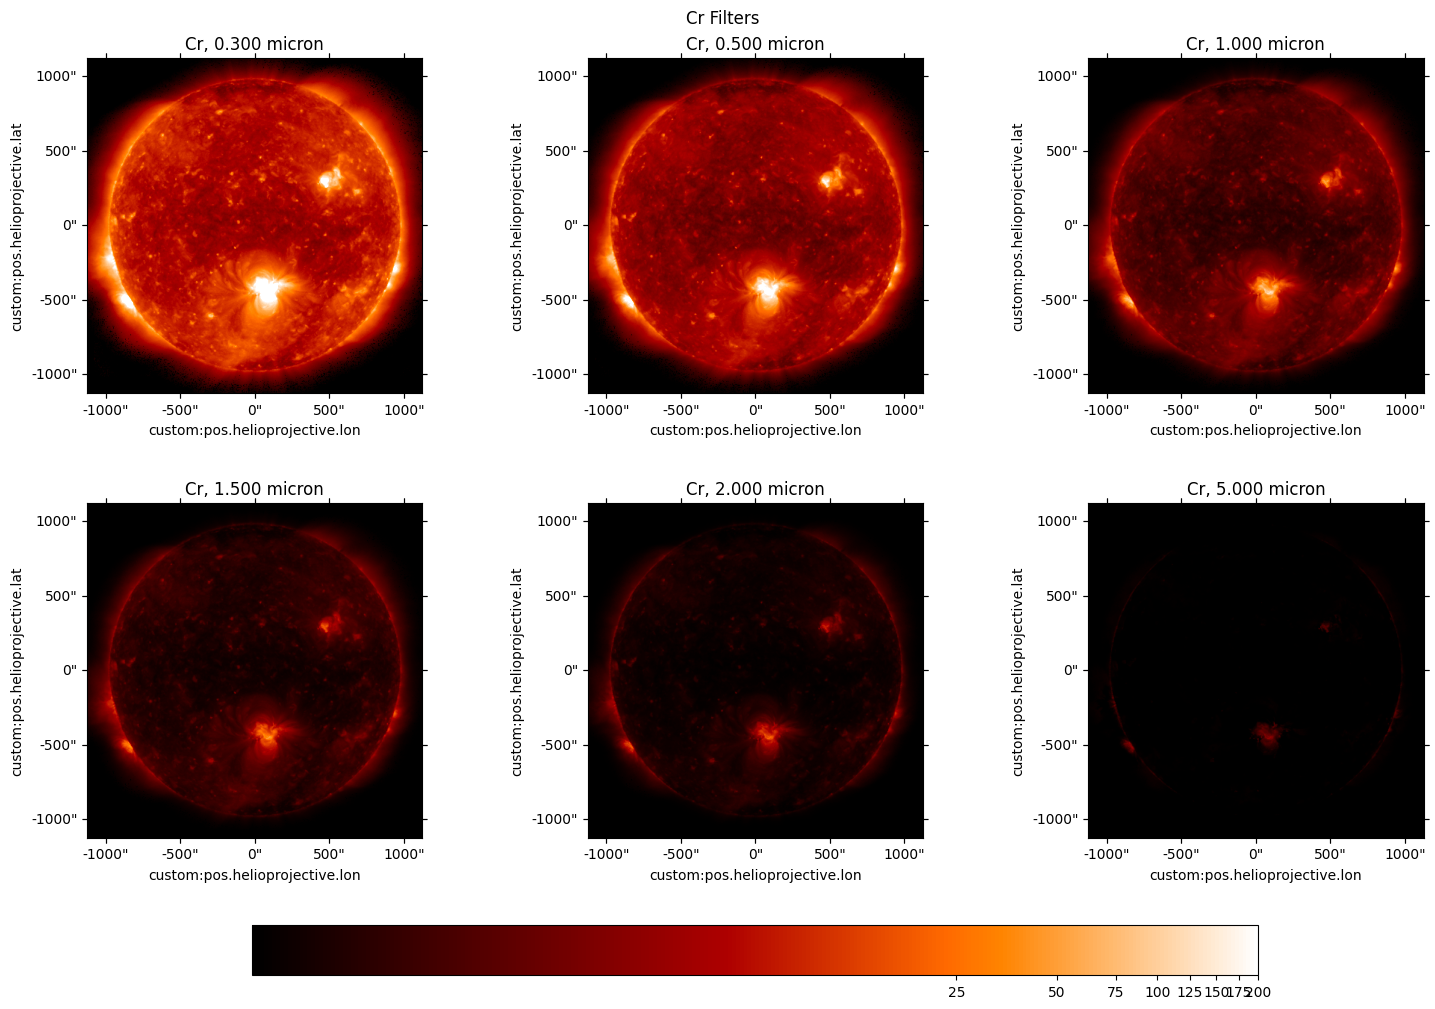

In [15]:
fig = plt.figure(figsize=(15,10), constrained_layout=True)
ax_list = []
for i,fg_image in enumerate(cr_images):
    ax = fig.add_subplot(2,3,i+1, projection=fg_image.wcs)
    fg_image.plot(axes=ax, norm=norm, cmap='hinodexrt', data_unit='ph / (pix h)')
    ax.set_title(fg_image.meta['FILTER'])
    ax_list.append(ax)
fig.suptitle('Cr Filters')
fig.colorbar(ax.get_images()[0], ax=[ax_list[-3], ax_list[-2], ax_list[-1]], location='bottom', )

### Ti

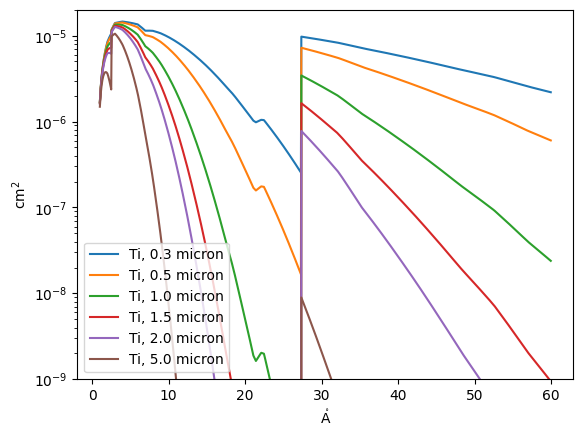

In [16]:
ti_filters = [ThinFilmFilter(elements='Ti', thickness=ft) for ft in filtergram_thicknesses]
with quantity_support():
    for ff in ti_filters:
        ch = Channel('filtergram', ff)
        label = f'{ff.chemical_formula}, {ff.thickness}'
        plt.plot(ch.wavelength, ch.effective_area, label=label)
    plt.yscale('log')
    plt.ylim(1e-9, 2e-5)
    plt.legend()

In [17]:
ti_images = [make_filtergram_quick(spectral_cube, tff) for tff in ti_filters]

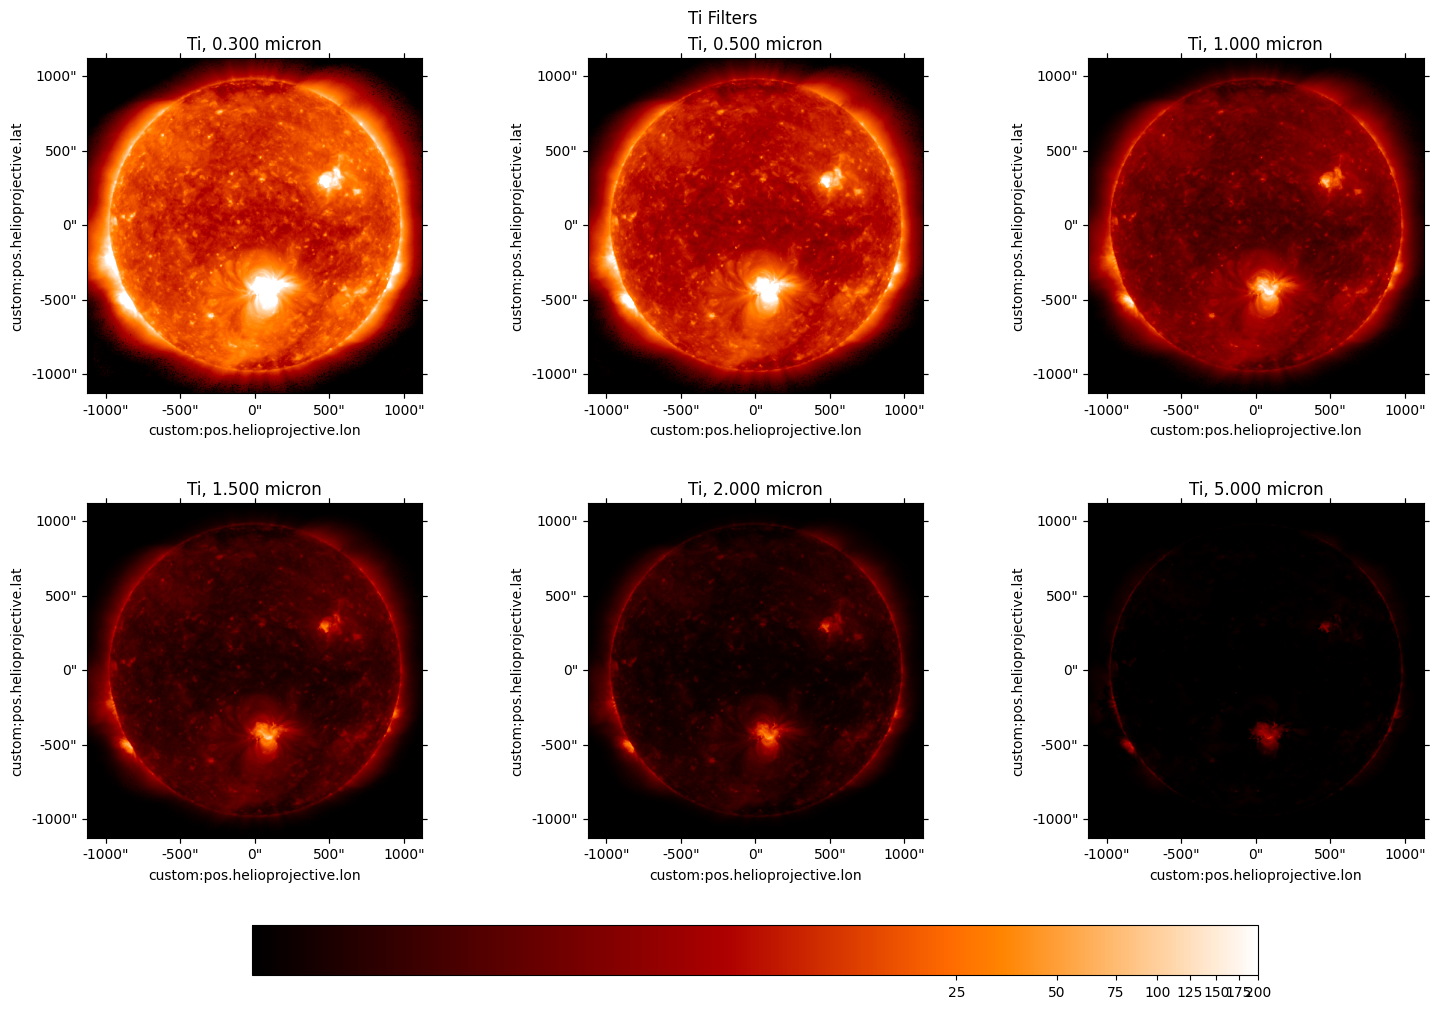

In [18]:
fig = plt.figure(figsize=(15,10), constrained_layout=True)
ax_list = []
for i,fg_image in enumerate(ti_images):
    ax = fig.add_subplot(2,3,i+1, projection=fg_image.wcs)
    fg_image.plot(axes=ax, norm=norm, cmap='hinodexrt', data_unit='ph / (pix h)')
    ax.set_title(fg_image.meta['FILTER'])
    ax_list.append(ax)
fig.suptitle('Ti Filters')
fig.colorbar(ax.get_images()[0], ax=[ax_list[-3], ax_list[-2], ax_list[-1]], location='bottom', )

## Compare Across Elements

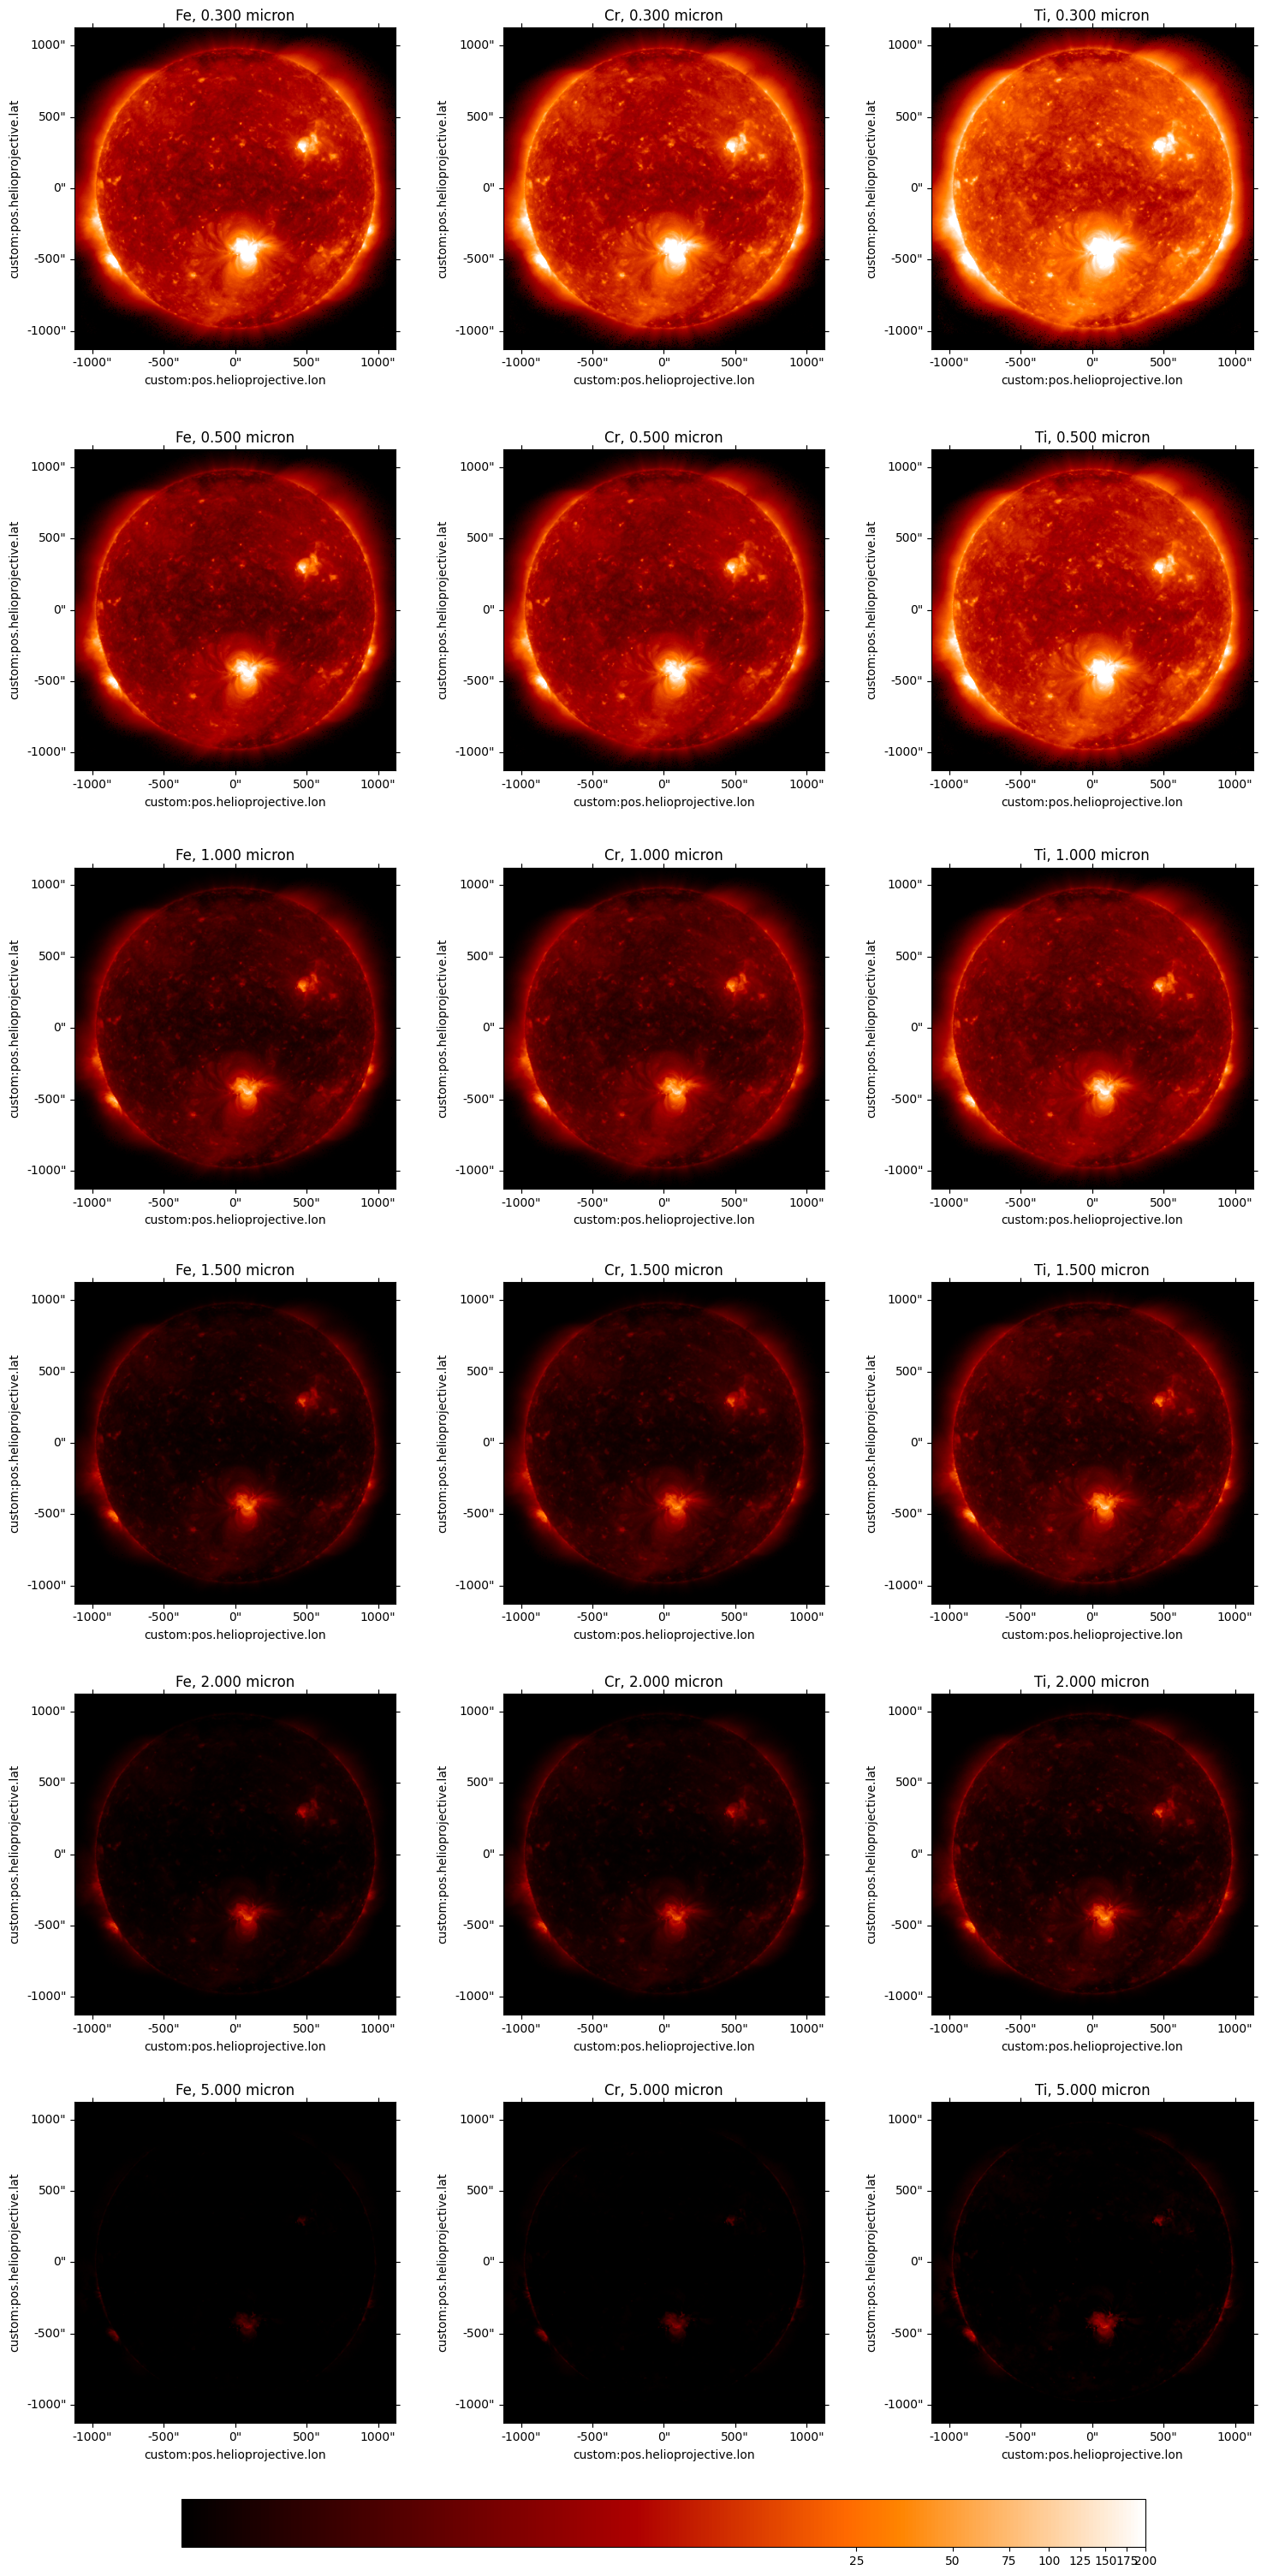

In [20]:
fig = plt.figure(figsize=(15,30), constrained_layout=True)
ax_list = []
# Fe
for i,fg_image in enumerate(iron_images):
    ax = fig.add_subplot(6,3,3*i+1, projection=fg_image.wcs)
    fg_image.plot(axes=ax, norm=norm, cmap='hinodexrt', data_unit='ph / (pix h)')
    ax.set_title(fg_image.meta['FILTER'])
ax_list.append(ax)
# Cr
for i,fg_image in enumerate(cr_images):
    ax = fig.add_subplot(6,3,3*i+2, projection=fg_image.wcs)
    fg_image.plot(axes=ax, norm=norm, cmap='hinodexrt', data_unit='ph / (pix h)')
    ax.set_title(fg_image.meta['FILTER'])
ax_list.append(ax)
# Ti
for i,fg_image in enumerate(ti_images):
    ax = fig.add_subplot(6,3,3*i+3, projection=fg_image.wcs)
    fg_image.plot(axes=ax, norm=norm, cmap='hinodexrt', data_unit='ph / (pix h)')
    ax.set_title(fg_image.meta['FILTER'])
ax_list.append(ax)
fig.colorbar(ax.get_images()[0], ax=ax_list, location='bottom', )